# Grouping spectra

This is a (hopefully) short notebook about grouping of PHA spectra in Sherpa. I'm not planning to discuss
everythng you can do, but let's see how this goes. The problem is that the addition of grouping support
for PHA spectra complicates the API (are we working on the grouped or ungrouped data), so it's not as easy as I would like it to be to get at the data we want.

## Setting up

The notebook assumes you have CIAO 4.11 installed, since it comes with Jupyter notebook support, so you
should just have to run the following command from your shell (in the directory that contains `grouping-spectra.ipynb` and the `3c273*` files:

    % jupyter notebook
    ...
    ... a lot of screen output
    ...
    
If you already have a web browser running then you will hopefully have a tab opened for you that lets
you start up this notebook, otherwise the screen output will show you the web address to use.

## When was this last run, and with that version of Sherpa?

In [1]:
import time
time.ctime()

'Tue Mar 12 12:03:30 2019'

In [2]:
!pip show sherpa

Name: sherpa
Version: ciao4.11
Summary: Modeling and fitting package for scientific data analysis
Home-page: http://cxc.harvard.edu/sherpa/
Author: Smithsonian Astrophysical Observatory / Chandra X-Ray Center
Author-email: cxchelp@head.cfa.harvard.edu
License: GNU GPL v3
Location: /home/dburke/local/ciao-4.11/lib/python3.5/site-packages/sherpa-ciao4.11-py3.5-linux-x86_64.egg
Requires: numpy, six
You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Note that the notebook works best when you are using the Matplotlib plotting backend for Sherpa
rather than the ChIPS one. This choice is made by editing a configuration file (`.sherpa.rc` in your
home directory) which is read the first time the Sherpa module is loaded. This means it has to be
changed before you import Sherpa. The `plot_pkg` setting should say `pylab` and not `chips` (in this
file, starting a line with '#' means it is a comment line and so ignored).

In [3]:
!grep plot_pkg ~/.sherpa.rc

# plot_pkg   : chips
plot_pkg : pylab


The following command doesn't appear to be necessary, but I include it to indicate I expect the
Matplotlib plots to appear within the notebook), and then load in NumPy and Matplotlib for later use.

In [4]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt

## Setting up

I am going to load up the `3c273` data set up an absorbed powerlaw - with parameter values taken
from a fit - just so that we have some data to work with:

In [5]:
from sherpa.astro import ui

ui.load_pha('data/pha/3c273.pi')
ui.subtract()

ui.notice(0.5, 7.0)

ui.set_source(ui.xsphabs.gal * ui.powlaw1d.pl)

gal.nh = 0.03616
pl.gamma = 2.0322
pl.ampl = 1.969e-4

statistical errors were found in file 'data/pha/3c273.pi' 
but not used; to use them, re-read with use_errors=True
read ARF file data/pha/3c273.arf
read RMF file data/pha/3c273.rmf
statistical errors were found in file 'data/pha/3c273_bg.pi' 
but not used; to use them, re-read with use_errors=True
read background file data/pha/3c273_bg.pi


With this setup we can create a plot of the grouped (and filtered) data, along
with the best-fit model:

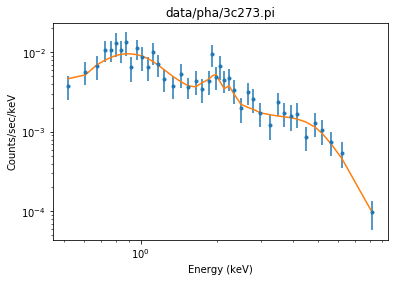

In [6]:
ui.set_xlog()
ui.set_ylog()
ui.plot_fit()

## Can I access the data used to create the plot?

We have accessor routines that represent the data used in the plot, but I also hope to show
how you can re-create this data (or at least some of the data) manually below.

First, with the accessor routines:

 - [get_data_plot](https://sherpa.readthedocs.io/en/4.11.0/ui/api/sherpa.astro.ui.get_data_plot.html)
 - [get_model_plot](https://sherpa.readthedocs.io/en/4.11.0/ui/api/sherpa.astro.ui.get_model_plot.html)
 - [get_fit_plot](https://sherpa.readthedocs.io/en/4.11.0/ui/api/sherpa.astro.ui.get_fit_plot.html)
 
### A note on documentation links

I am going to use the documentation from the 
["standalone" version of Sherpa](https://sherpa.readthedocs.io/en/4.11.0/) rather than CIAO,
as they are better integrated with the Sherpa API - that is, you can get to some of the
class-based documentation such as
[the DataPlot class](https://sherpa.readthedocs.io/en/4.11.0/plots/api/sherpa.astro.plot.DataPlot.html).

### Back to the scheduled programming

The `get_xxx_plot` routines return an object that contains the data needed to create the plot,
and are evaluated at the time they are called (that is, if you call `plot_fit`, then change the
energy filter or alter  model parameter, and then call `get_fit_plot` the results will
represent the changes you have just made, not the data used to create the on-screen plot).

I start with the `fit` plot which is a combination of a `data` plot and a `model` plot:

In [7]:
fplot = ui.get_fit_plot()
fplot

The `dataplot` and `modelplot` attributes contain
[`DataPlot`](https://sherpa.readthedocs.io/en/4.11.0/plots/api/sherpa.astro.plot.DataPlot.html)
and
[`ModelPlot`](https://sherpa.readthedocs.io/en/4.11.0/plots/api/sherpa.astro.plot.ModelPlot.html)
instances respectively (in this case they are the same as calling `get_data_plot` and `get_model_plot` [$*$]):

[$*$] actually, turns out I mis-spoke here: the model plot created by fit is not a histogram, but if you use `get_model_plot` - as [discussed below](#Can-I-re-create-the-model-plot%3F) - you get a histogram.

In [8]:
print(fplot)

dataplot   = data/pha/3c273.pi
x      = [ 0.5183, 0.6059, 0.6716, 0.7227, 0.7665, 0.803 , 0.8395, 0.876 , 0.9198,
  0.9709, 1.0147, 1.0658, 1.1169, 1.168 , 1.241 , 1.3432, 1.4381, 1.5403,
  1.6498, 1.752 , 1.8542, 1.9199, 1.9856, 2.0586, 2.1389, 2.2338, 2.336 ,
  2.4893, 2.6499, 2.7886, 2.9711, 3.2339, 3.4748, 3.6792, 3.9128, 4.1391,
  4.4822, 4.8691, 5.1976, 5.6356, 6.2342, 8.2198]
y      = [  3.7716e-03,  5.6355e-03,  6.6602e-03,  1.0656e-02,  1.0656e-02,
   1.3201e-02,  1.0576e-02,  1.3320e-02,  6.4805e-03,  1.1169e-02,
   8.8004e-03,  6.6003e-03,  1.0064e-02,  7.1043e-03,  4.6563e-03,
   3.7142e-03,  5.3282e-03,  3.6696e-03,  4.4002e-03,  3.4623e-03,
   4.4002e-03,  9.4723e-03,  4.9124e-03,  6.6602e-03,  4.4643e-03,
   4.7362e-03,  3.3301e-03,  1.9756e-03,  3.1574e-03,  2.5922e-03,
   1.7281e-03,  1.2230e-03,  2.3481e-03,  1.7311e-03,  1.5902e-03,
   1.6962e-03,  8.5059e-04,  1.2847e-03,  1.0601e-03,  7.4942e-04,
   5.4269e-04,  9.7735e-05]
yerr   = [  1.2632e-03,  1.8124e-03,  2.2

The objects have a `plot` method which will create a plot, so you can access the components separately:

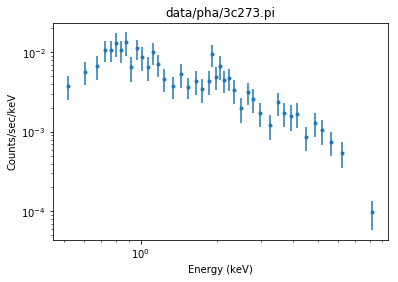

In [9]:
fplot.dataplot.plot()

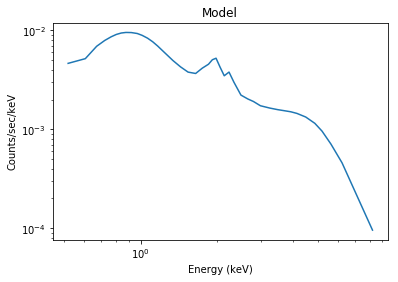

In [10]:
fplot.modelplot.plot()

or you can plot them together:

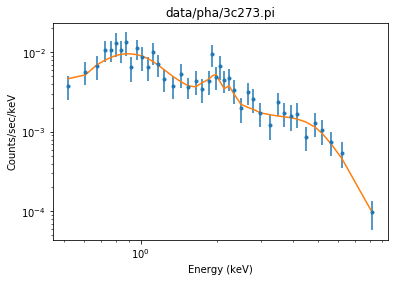

In [11]:
fplot.plot()

If you want, you can access the data directly, such as the data points using the
`x`, `y`, and `yerr` fields (here I display the first five values and you can see
they match the values used in the plot):

In [12]:
list(zip(fplot.dataplot.x, fplot.dataplot.y, fplot.dataplot.yerr))[0:5]

[(0.51829999685287476, 0.0037716153818110744, 0.0012631612592398642),
 (0.60590000450611115, 0.0056354730171613307, 0.0018124040722667545),
 (0.67160001397132874, 0.006660236700166901, 0.0022089791626158741),
 (0.72269999980926514, 0.010656375094869093, 0.0031590644578402991),
 (0.76649999618530273, 0.010656375094869093, 0.0031590644578402991)]

We can also get at the model data, which is also represented as a "curve" rather than "histogram" (so has
`x,y` rather than `xlo,xhi,y`):

In [13]:
list(zip(fplot.modelplot.x, fplot.modelplot.y))[0:5]

[(0.51829999685287476, 0.0046522770992596654),
 (0.60590000450611115, 0.0051899489114260915),
 (0.67160001397132874, 0.0069255504990255899),
 (0.72269999980926514, 0.007929704794361286),
 (0.76649999618530273, 0.0086414053411067032)]

So, if you just want access to the plotted data, then the following routines are useful
(I would have used `ui.get_*_plot?` but I'm not sure the output would be saved to the notebook
so ended up with the following):

In [14]:
[n for n in dir(ui) if n.startswith('get_') and n.endswith('_plot')]

['get_arf_plot',
 'get_bkg_chisqr_plot',
 'get_bkg_delchi_plot',
 'get_bkg_fit_plot',
 'get_bkg_model_plot',
 'get_bkg_plot',
 'get_bkg_ratio_plot',
 'get_bkg_resid_plot',
 'get_bkg_source_plot',
 'get_cdf_plot',
 'get_chisqr_plot',
 'get_data_plot',
 'get_delchi_plot',
 'get_fit_plot',
 'get_kernel_plot',
 'get_model_component_plot',
 'get_model_plot',
 'get_order_plot',
 'get_pdf_plot',
 'get_psf_plot',
 'get_pvalue_plot',
 'get_ratio_plot',
 'get_resid_plot',
 'get_scatter_plot',
 'get_source_component_plot',
 'get_source_plot',
 'get_split_plot',
 'get_trace_plot']

### A histogram-style plot

The `plot_source` command draws a histogram rather than a curve:

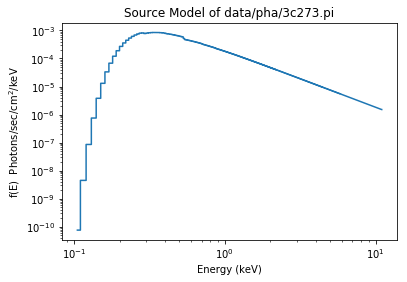

In [15]:
splot = ui.get_source_plot()
splot.plot()

so the fields are slightly different (`xlo`, `xhi`, and `y`):

In [16]:
list(zip(splot.xlo, splot.xhi, splot.y))[0:5]

[(0.10000000149011612, 0.10999999940395355, 7.6681785964192861e-11),
 (0.10999999940395355, 0.11999999731779099, 4.5282047068824529e-09),
 (0.11999999731779099, 0.12999999523162842, 8.6250345142013215e-08),
 (0.12999999523162842, 0.14000000059604645, 7.527889611865157e-07),
 (0.14000000059604645, 0.15000000596046448, 3.8030609988290058e-06)]

## Can we create this data manually?

Let's start by seeing if we can go from the ungrouped to grouped data. I am going to
use a combination of routines from the `sherpa.astro.ui` module and methods on Sherpa
objects.

In [17]:
d = ui.get_data()
print(d)

name           = data/pha/3c273.pi
channel        = Float64[1024]
counts         = Float64[1024]
staterror      = None
syserror       = None
bin_lo         = None
bin_hi         = None
grouping       = Int16[1024]
quality        = Int16[1024]
exposure       = 38564.6089269
backscal       = 2.52643646989e-06
areascal       = 1.0
grouped        = True
subtracted     = True
units          = energy
rate           = True
plot_fac       = 0
response_ids   = [1]
background_ids = [1]


We can use this to plot channels against counts (and I throw in the grouping column too), but
it doesn't really match the majesty of `plot_data`, does it?

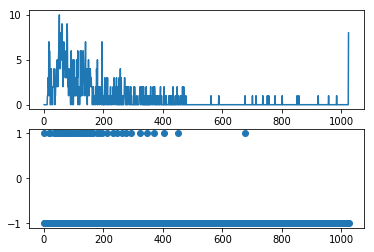

In [18]:
plt.subplot(2, 1, 1)
plt.plot(d.channel, d.counts)

plt.subplot(2, 1, 2)
plt.plot(d.channel, d.grouping, 'o')

To make my life easier, I am going to switch `plot_data` to use channels rather than energy:

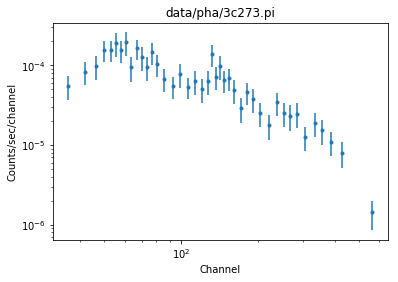

In [19]:
ui.set_analysis('channel')
pdata = ui.get_data_plot()
pdata.plot()

Our first step is to group the channel data. The grouping channel defines the mapping - a value of 1 starts the bin and -1 continues the bin, so a grouping of `[1, 1, -1, -1, 1, -1]` represents three "groups", having lengths of `[1, 3, 2]` channels. We could use some clever NumPy indexing routines, or use the CIAO `group` module. A warning, this has not been optimised for Python/NumPy use, since it is a direct translation of the underlying C code that CIAO uses to do the grouping!

There is some basic information on this module via [`ahelp group group`](http://cxc.harvard.edu/ciao/ahelp/group.html): the routines we want here are `grpGetGroupSum` and `grpGetChansPerGroup`.

In [20]:
import group

In [21]:
gcounts = group.grpGetGroupSum(d.counts, d.grouping)
gchans = group.grpGetChansPerGroup(d.grouping)

# Need to extract the value for each group; this is done by picking the
# value from the first channel in the group.
#
gfilt = d.grouping == 1

xwidth = gchans[gfilt]
xstart = d.channel[gfilt]
xend = xstart + xwidth
y = gcounts[gfilt]

So, this is getting us closer, but it still doesn't match the data plot since:

- no division by exposure time
- no division by bin width
- no filter by channel number

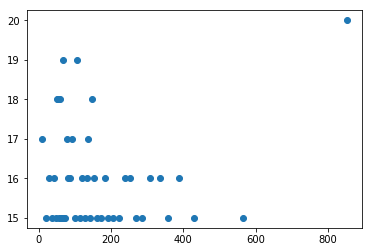

In [22]:
plt.plot((xstart + xend) / 2, y, 'o')

It's easy now to scale by the bin width, and the data object has the 
[exposure time as an attribute](https://sherpa.readthedocs.io/en/4.11.0/data/api/sherpa.astro.data.DataPHA.html#sherpa.astro.data.DataPHA.exposure). If we also add in log scaling we can see it's much closer:

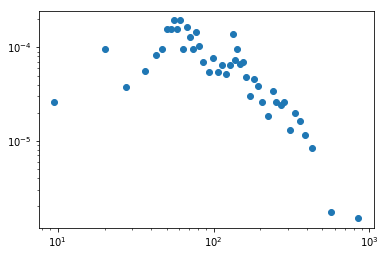

In [23]:
xmid = (xstart + xend) / 2
yscaled = y / d.exposure / xwidth

plt.plot(xmid, yscaled, 'o')
plt.xscale('log')
plt.yscale('log')

In fact, let's overplot the data to see how well we are doing:

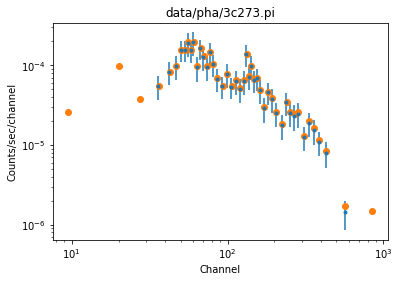

In [24]:
pdata.plot()
plt.plot(xmid, yscaled, 'o')

Apart from the filtering, I'd like to call that a siccess, except that the new values are larger than the old ones, because I've forgotten about background subtraction! This means we have to deal with scaling the background to the observation for both exposure time (although in this case they are the same) and extraction area (which we do with the `BACKSCAL` values [$\dagger$]):

[$\dagger$] for this Chandra dataset we don't have to worry about the `AREASCAL` value since it's the same for both source and background.

In [25]:
bkg = d.get_background()

bcounts = group.grpGetGroupSum(bkg.counts, d.grouping)

bscale = d.exposure * d.backscal / (bkg.exposure * bkg.backscal)

ysub = gcounts[gfilt] - bscale * bcounts[gfilt]
ysubscaled = ysub / d.exposure / xwidth

With this correction in place, things look a lot better.

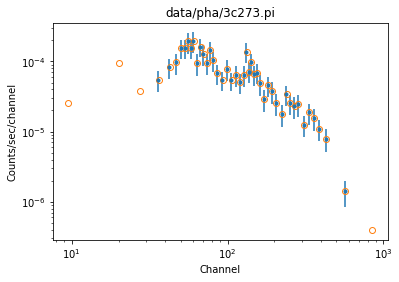

In [26]:
pdata.plot()
plt.plot(xmid, ysubscaled, 'o', fillstyle='none')

We still need to work on the spatial filter, for which we use the `mask` attribute of the data object. Note that this has already been grouped for us; ie it's length matches the number of groups not the number of channels.

In [27]:
d.channel.size, d.mask.size, ysub.size

(1024, 46, 46)

This means it is an easy filter to apply:

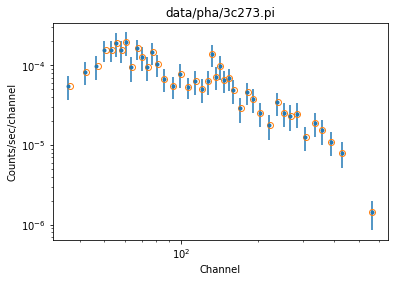

In [28]:
pdata.plot()
plt.plot(xmid[d.mask], ysubscaled[d.mask], 'o', fillstyle='none')

There appears to be some visual offsets in the X direction for some of the bins, but I believe that is down to the fact I am not using exactly the same shapes, and there's pixellation going on. We can check this be comparing the calculated bin values rather than using the plot above:

In [29]:
dx = pdata.x - xmid[d.mask]
dy = pdata.y - ysubscaled[d.mask]

In [30]:
dx.min(), dx.max(), np.median(dx)

(-0.5, -0.5, -0.5)

Oh. That's a bit disappointing. There actually *is* a difference in the X-axis positions! The values I caluclate are larger than the Sherpa values by a half:

In [31]:
list(zip(pdata.x, xmid[d.mask]))[0:5]

[(36.0, 36.5), (42.0, 42.5), (46.5, 47.0), (50.0, 50.5), (53.0, 53.5)]

I don't have time to dig into this; I wonder if Sherpa always uses the start of the channel and not the middle of it? 

Let's also try the Y axis, where I expect to see small numerical differences, but hopefully all $\lll 10^{-6}$.

In [32]:
dy.min(), dy.max(), np.median(dy)

(0.0, 2.7105054312137611e-20, 0.0)

Success!

## Can I re-create the model plot?

Note that `get_model_plot` returns a "histogram" - so it has `xlo` and `xhi` fields rather than `x`.

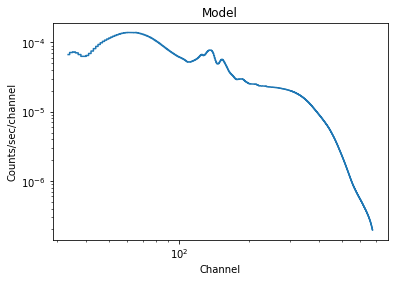

In [33]:
mplot = ui.get_model_plot()
mplot.plot()

In [34]:
list(zip(mplot.xlo, mplot.xhi))[0:5]

[(33.0, 34.0), (34.0, 35.0), (35.0, 36.0), (36.0, 37.0), (37.0, 38.0)]

Hmmm, these don't match up with the grouped channels we expect:

In [35]:
list(zip(xstart[d.mask], xend[d.mask]))[0:5]

[(18.0, 22.0), (22.0, 33.0), (33.0, 40.0), (40.0, 45.0)]

The start position is different (33 versus 18) and the model plot appears to use single-channel bins, not grouped. The second part is intended, since it was felt users would want to see the model at its "highest" resolution. I am not completely sure I understand why the X axis is different - there is definitely complications when you have grouping and filtering together, but I don't think it can explain all this - but for now let's just roll with it.

I want to be able to evaluate the source model to get the predicted values, but there are complications. The source model, as given by the user, can be retrieved with `get_source`, and the "actual" model - that includes the instrumental response - with `get_model`.

In [36]:
smdl = ui.get_source()
fmdl = ui.get_model()

print(smdl.name)
print(fmdl.name)

(xsphabs.gal * powlaw1d.pl)
apply_rmf(apply_arf((38564.608926889 * (xsphabs.gal * powlaw1d.pl))))


Normally I would just pass in the grid on which I want the model to be evaluated to these models,
but that doesn't work here because of the extra complications of the response model. Note that the
return value is 1024 elements long, even when the input grid is much smaller, for the "full model":

In [37]:
smdl([0.1, 0.2, 0.3]).shape

(3,)

In [38]:
fmdl([0.1, 0.2, 0.3]).shape

(1024,)

The model is ignoring the user's grid since it knows better, and evaluating it over the PI channel space. So we can try and compare to the model plot (in this case we only have to normalize by the exposure time since the bn width is 1 by construction):

In [39]:
ymdl = fmdl([1])  # just apply an argument to get a return

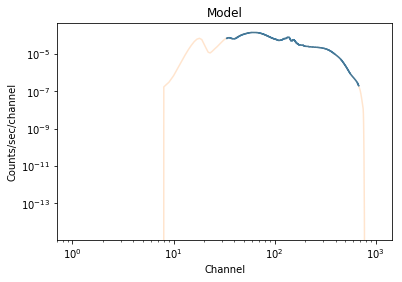

In [40]:
mplot.plot()
plt.plot(np.arange(1, 1025, 1), ymdl / d.exposure, alpha=0.2)

So, other than the filtering, we have the same result. We can group this to match the data using the grouping library:

In [41]:
ymdl_group = group.grpGetGroupSum(ymdl, d.grouping)
ymdl_group = ymdl_group[gfilt]

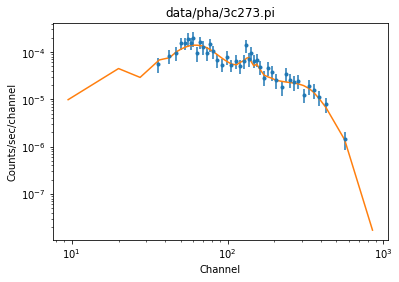

In [42]:
pdata.plot()
plt.plot(xmid, ymdl_group / d.exposure / xwidth)

# WHAT IS GOING ON HERE?

The following are notes for me, as something odd has started to happen.

The DataPHA object has `eval_model` and `eval_model_to_fit` methods which can be used to apply filtering
and grouping to the model evaluation, but they don't seem to be working for me here - i.e. the output is 4 elements long - so I'm going to skip this just now.

In [43]:
d.eval_model_to_fit(fmdl)

array([  6.89383556,  12.32100274,  18.3360341 ,  14.61083233])

In [44]:
d.eval_model_to_fit(smdl)

array([  1.90146944e-06,   2.78962266e-06,   9.56687825e-07,
         4.06516515e-07])

In [45]:
fmdl(1).shape

(1024,)

We can also see this in Sherpa - note the `plot_fit` output below now only has 4 bins in it - so something strange is definitely afoot at this Circle K.

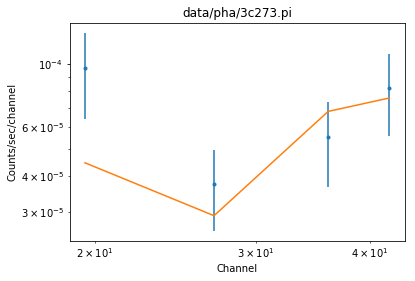

In [46]:
ui.plot_fit()